# Distributions and Clustering

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
USERS_PARQUET_PATH = "RefinedData/BeerAdvocate/users_with_scores.parquet"
users_df = pd.read_parquet(USERS_PARQUET_PATH)

In [4]:
users_df.describe()

,n_ratings,n_reviews,cfm_score,exp_score,xpl_score,adv_score,is_cfm,is_exp,is_xpl,is_adv
count,57108.000000,57108.000000,57108.000000,57108.000000,57108.000000,57108.000000,57108.000000,57108.000000,57108.000000,57108.000000
mean,132.140068,41.577222,-1.521565,-0.455170,0.087978,0.072911,0.100004,0.029593,0.136058,0.100004
std,387.875528,221.338522,1.863792,0.210935,0.130990,0.125241,0.300007,0.169463,0.342853,0.300007
min,5.000000,0.000000,-63.747995,-3.542857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,0.000000,-1.774929,-0.525845,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,23.000000,1.000000,-1.085113,-0.413928,0.043478,0.017544,0.000000,0.000000,0.000000,0.000000
75%,88.000000,10.000000,-0.680349,-0.331429,0.125000,0.095238,0.000000,0.000000,0.000000,0.000000
max,12046.000000,8970.000000,-0.003932,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Score Distributions and Clustering

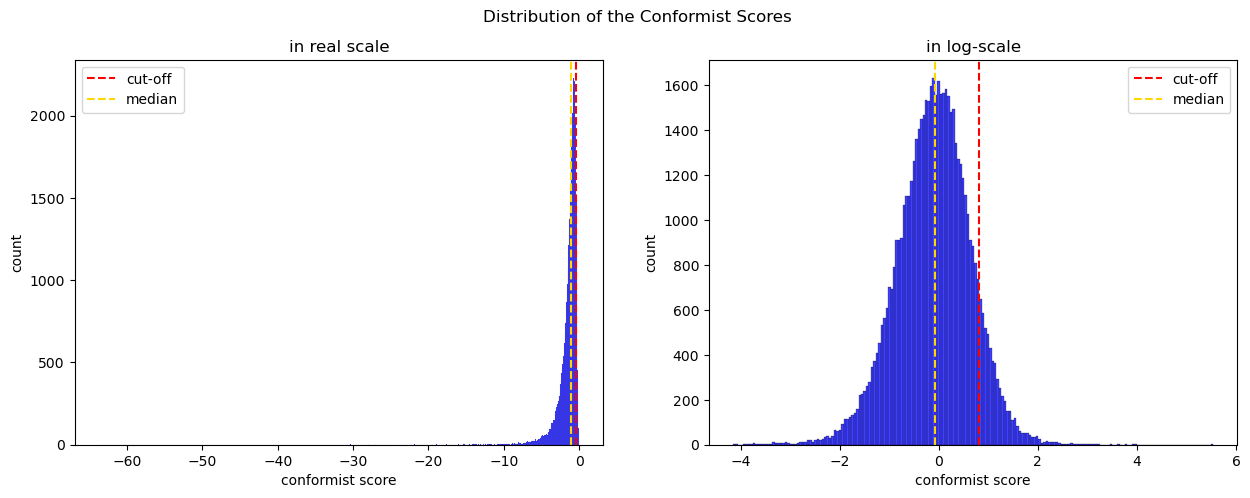

In [5]:
cfm_cutoff = users_df["cfm_score"].quantile(0.9)
cfm_median = users_df["cfm_score"].median()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

fig.suptitle("Distribution of the Conformist Scores")

sns.histplot(data=users_df, x="cfm_score", ax=ax1, color="blue")
ax1.set_title("in real scale")
ax1.set_xlabel("conformist score")
ax1.set_ylabel("count")
ax1.axvline(x=cfm_cutoff, color="red", ls="--", label="cut-off")
ax1.axvline(x=cfm_median, color="gold", ls="--", label="median")  
ax1.legend()

sns.histplot(data=-np.log(-users_df["cfm_score"]), ax=ax2, color="blue")
ax2.set_title("in log-scale")
ax2.set_xlabel("conformist score")
ax2.set_ylabel("count")
ax2.axvline(x=-np.log(-cfm_cutoff), color="red", ls="--", label="cut-off")
ax2.axvline(x=(-np.log(-cfm_median)), color="gold", ls="--", label="median")
ax2.legend();

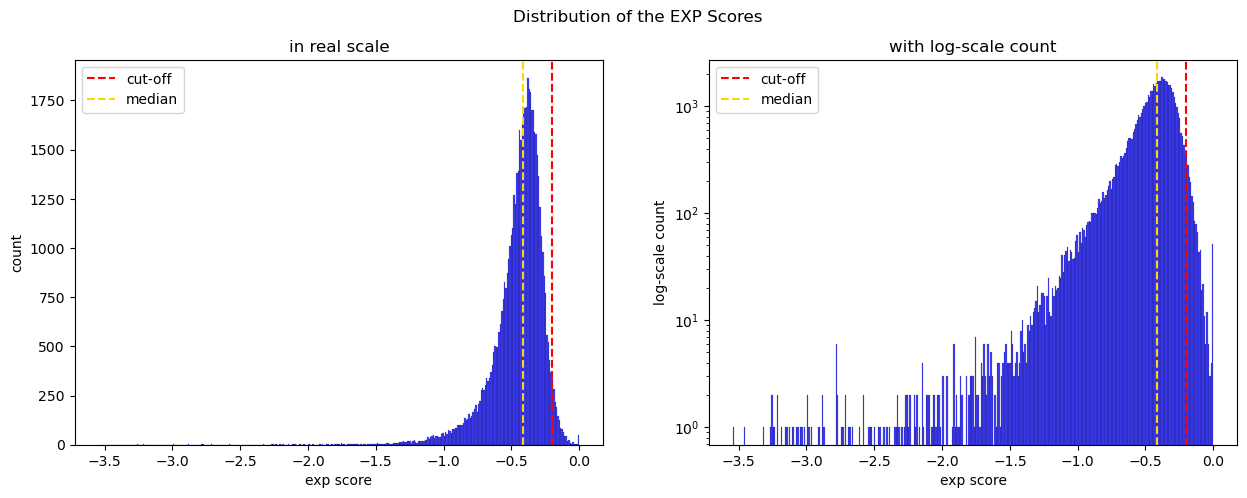

In [6]:
exp_cutoff = -0.2
exp_median = users_df["exp_score"].median()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

fig.suptitle("Distribution of the EXP Scores")

sns.histplot(data=users_df, x="exp_score", ax=ax1, color="blue")
ax1.set_title("in real scale")
ax1.set_xlabel("exp score")
ax1.set_ylabel("count")
ax1.axvline(x=exp_cutoff, color="red", ls="--", label="cut-off")
ax1.axvline(x=exp_median, color="gold", ls="--", label="median")
ax1.legend()

sns.histplot(data=users_df, x="exp_score", ax=ax2, log_scale=(False, True), color="blue")
ax2.set_title("with log-scale count")
ax2.set_xlabel("exp score")
ax2.set_ylabel("log-scale count")
ax2.axvline(x=exp_cutoff, color="red", ls="--", label="cut-off")
ax2.axvline(x=exp_median, color="gold", ls="--", label="median")
ax2.legend();

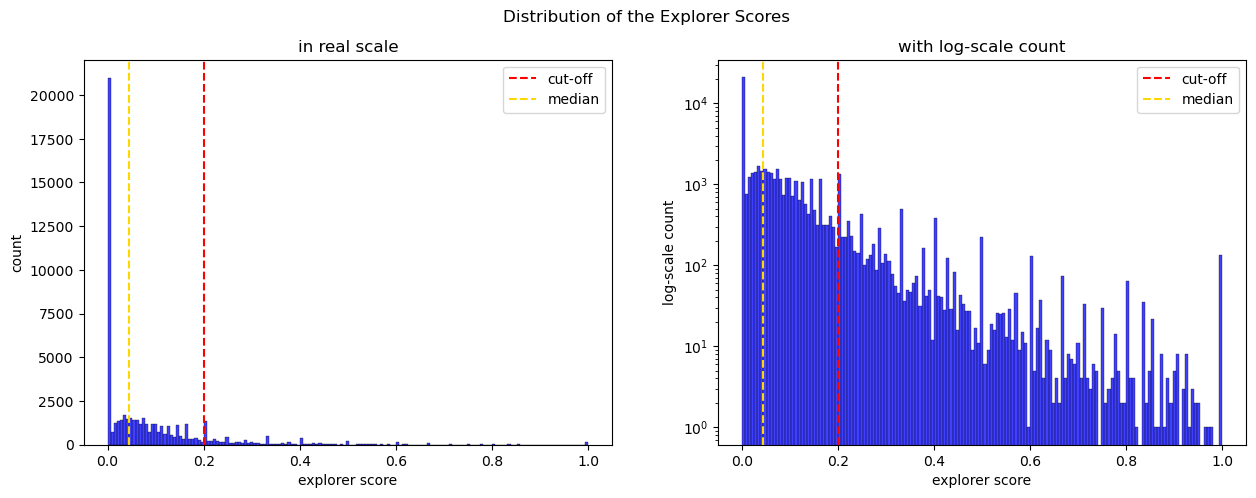

In [7]:
xpl_cutoff = users_df["xpl_score"].quantile(0.88)
xpl_median = users_df["xpl_score"].median()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

fig.suptitle("Distribution of the Explorer Scores")

sns.histplot(data=users_df, x="xpl_score", ax=ax1, color="blue")
ax1.set_title("in real scale")
ax1.set_xlabel("explorer score")
ax1.set_ylabel("count")
ax1.axvline(x=xpl_cutoff, color="red", ls="--", label="cut-off")
ax1.axvline(x=xpl_median, color="gold", ls="--", label="median")  
ax1.legend()

sns.histplot(data=users_df, x="xpl_score", ax=ax2, log_scale=(False, True), color="blue")
ax2.set_title("with log-scale count")
ax2.set_xlabel("explorer score")
ax2.set_ylabel("log-scale count")
ax2.axvline(x=xpl_cutoff, color="red", ls="--", label="cut-off") 
ax2.axvline(x=xpl_median, color="gold", ls="--", label="median")       
ax2.legend();

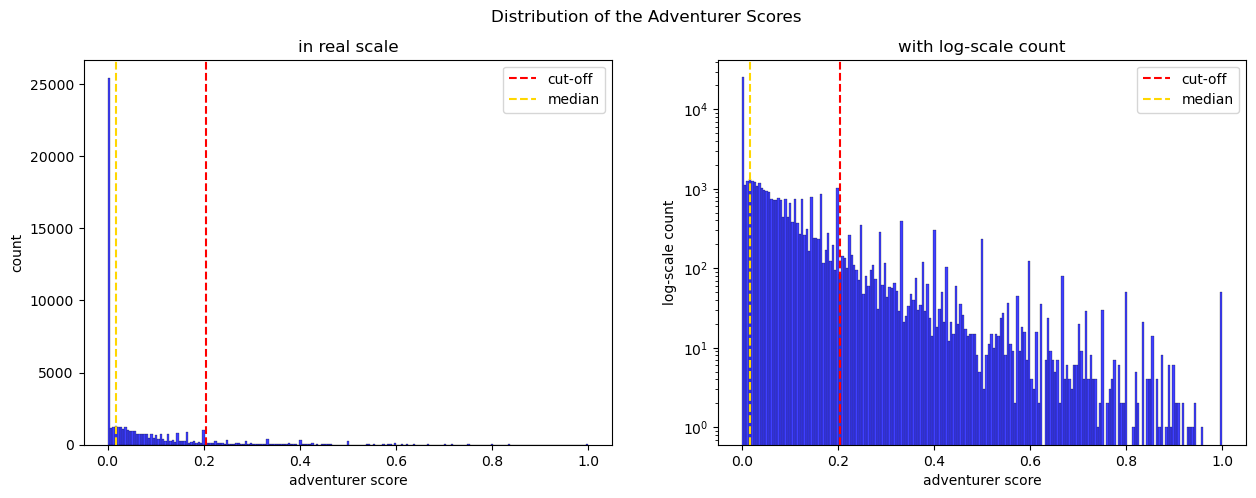

In [8]:
adv_cutoff = users_df["adv_score"].quantile(0.9)
adv_median = users_df["adv_score"].median()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

fig.suptitle("Distribution of the Adventurer Scores")

sns.histplot(data=users_df, x="adv_score", ax=ax1, color="blue")
ax1.set_title("in real scale")
ax1.set_xlabel("adventurer score")
ax1.set_ylabel("count")
ax1.axvline(x=adv_cutoff, color="red", ls="--", label="cut-off")
ax1.axvline(x=adv_median, color="gold", ls="--", label="median")
ax1.legend()

sns.histplot(data=users_df, x="adv_score", ax=ax2, log_scale=(False, True), color="blue")
ax2.set_title("with log-scale count")
ax2.set_xlabel("adventurer score")
ax2.set_ylabel("log-scale count")
ax2.axvline(x=adv_cutoff, color="red", ls="--", label="cut-off")
ax2.axvline(x=adv_median, color="gold", ls="--", label="median")
ax2.legend();

## Statistical Analysis: Classes and the Number of Ratings and Reviews.

### Number of Ratings

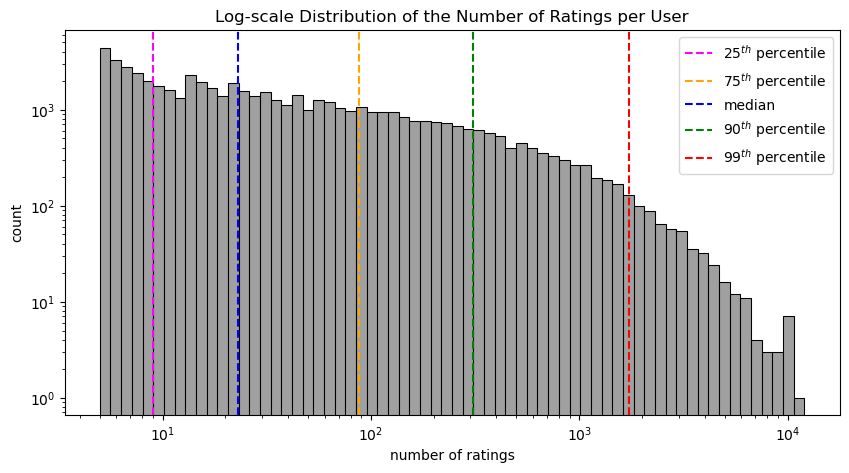

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.histplot(data=users_df, x="n_ratings", log_scale=(True, True), ax=ax, color="grey")
ax.axvline(x=users_df.n_ratings.quantile(0.25), color="magenta", ls="--", label=r"$25^{th}$ percentile")
ax.axvline(x=users_df.n_ratings.quantile(0.75), color="orange", ls="--", label=r"$75^{th}$ percentile")
ax.axvline(x=users_df.n_ratings.median(), color="blue", ls="--", label="median")
ax.axvline(x=users_df.n_ratings.quantile(0.9), color="green", ls="--", label=r"$90^{th}$ percentile")
ax.axvline(x=users_df.n_ratings.quantile(0.99), color="red", ls="--", label=r"$99^{th}$ percentile")
ax.set_xlabel("number of ratings")
ax.set_ylabel("count")
ax.set_title("Log-scale Distribution of the Number of Ratings per User")
ax.legend();

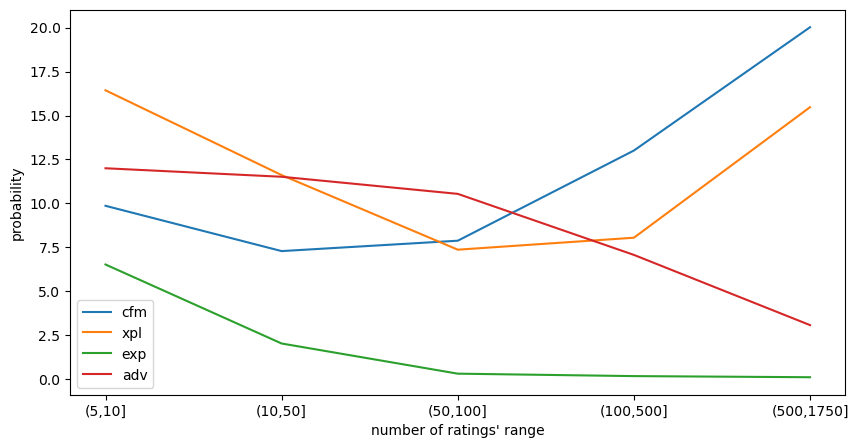

In [10]:
n_ratings_intervals = [users_df.n_ratings.min(), 10, 50, 100, 500, 1750]

percs={
    "cfm_p": [],
    "xpl_p": [],
    "exp_p": [],
    "adv_p": []
}
bounds=[]

for i in range(1, len(n_ratings_intervals)):
    if i == 1:
        lowerbound = users_df.n_ratings.min()
    else:
        lowerbound = n_ratings_intervals[i-1]
    upperbound = n_ratings_intervals[i]
    bounds.append("(%d,%d]"%(lowerbound, upperbound))
    
    users_in_interval_df = users_df.query("@lowerbound < n_ratings and n_ratings <= @upperbound")
    
    percs["cfm_p"].append(users_in_interval_df['is_cfm'].mean()*100)
    percs["exp_p"].append(users_in_interval_df['is_exp'].mean()*100)
    percs["xpl_p"].append(users_in_interval_df['is_xpl'].mean()*100)
    percs["adv_p"].append(users_in_interval_df['is_adv'].mean()*100)
    
p_by_n_ratings_df = pd.DataFrame(
    data={"bounds": bounds, 
          "cfm_p": percs["cfm_p"], 
          "xpl_p": percs["xpl_p"], 
          "exp_p": percs["exp_p"],
          "adv_p": percs["adv_p"]
          })

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
for name in percs.keys():
    sns.lineplot(data=p_by_n_ratings_df, y=name, x=p_by_n_ratings_df.bounds, ax=ax)
ax.set_xlabel("number of ratings' range")
ax.set_ylabel("probability")
ax.legend(labels=["cfm", "xpl", "exp", "adv"]);

### Number of Reviews

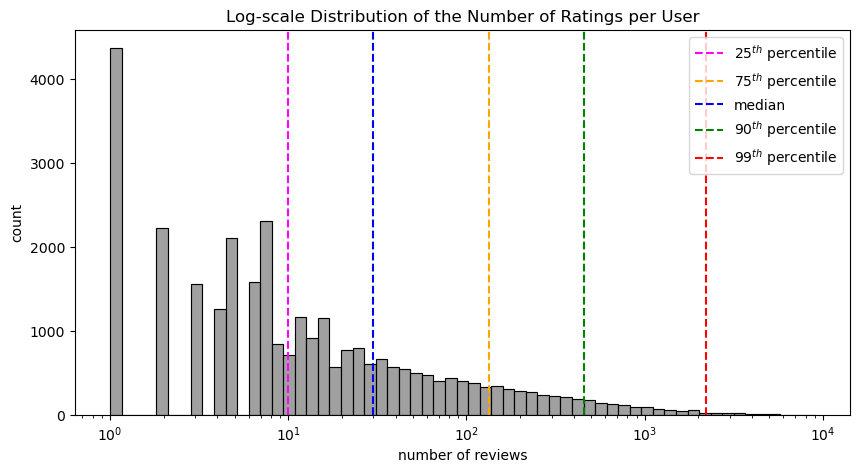

In [11]:
users_with_reviews_df = users_df.query("n_reviews > 0")

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.histplot(data=users_with_reviews_df, x="n_reviews", log_scale=True, ax=ax, color="grey")
ax.axvline(x=users_with_reviews_df.n_ratings.quantile(0.25), color="magenta", ls="--", label=r"$25^{th}$ percentile")
ax.axvline(x=users_with_reviews_df.n_ratings.quantile(0.75), color="orange", ls="--", label=r"$75^{th}$ percentile")
ax.axvline(x=users_with_reviews_df.n_ratings.median(), color="blue", ls="--", label="median")
ax.axvline(x=users_with_reviews_df.n_ratings.quantile(0.9), color="green", ls="--", label=r"$90^{th}$ percentile")
ax.axvline(x=users_with_reviews_df.n_ratings.quantile(0.99), color="red", ls="--", label=r"$99^{th}$ percentile")
ax.set_xlabel("number of reviews")
ax.set_ylabel("count")
ax.set_title("Log-scale Distribution of the Number of Ratings per User")
ax.legend();

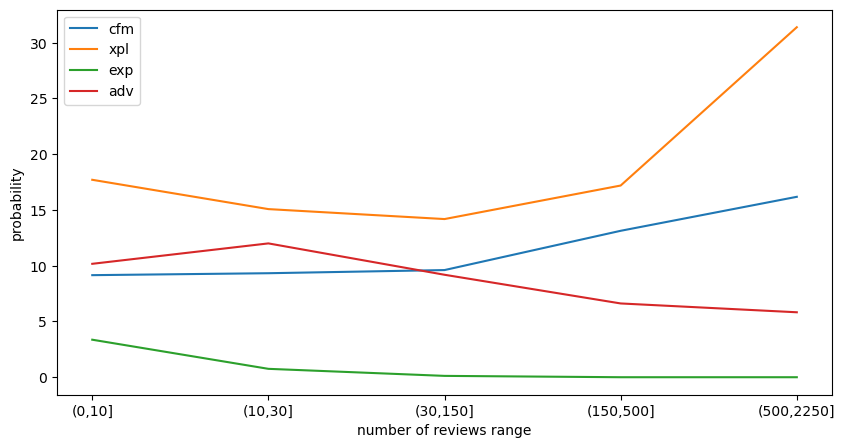

In [12]:
n_reviews_intervals = [0, 10, 30, 150, 500, 2250]

percs2={
    "cfm_p": [],
    "xpl_p": [],
    "exp_p": [],
    "adv_p": []
}
bounds2=[]

for i in range(1, len(n_reviews_intervals)):
    lowerbound = n_reviews_intervals[i-1]
    upperbound = n_reviews_intervals[i]
    bounds2.append("(%d,%d]"%(lowerbound, upperbound))
    
    users_in_interval_df = users_with_reviews_df.query("@lowerbound < n_reviews and n_reviews <= @upperbound")
    
    percs2["cfm_p"].append(users_in_interval_df['is_cfm'].mean()*100)
    percs2["exp_p"].append(users_in_interval_df['is_exp'].mean()*100)
    percs2["xpl_p"].append(users_in_interval_df['is_xpl'].mean()*100)
    percs2["adv_p"].append(users_in_interval_df['is_adv'].mean()*100)
    
p_by_n_reviews_df = pd.DataFrame(
    data={"bounds": bounds2, 
          "cfm_p": percs2["cfm_p"], 
          "xpl_p": percs2["xpl_p"], 
          "exp_p": percs2["exp_p"],
          "adv_p": percs2["adv_p"]
          })

p_by_n_reviews_df

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
for name in percs.keys():
    sns.lineplot(data=p_by_n_reviews_df, y=name, x=p_by_n_reviews_df.bounds, ax=ax, label=name.split("_")[0])
ax.set_xlabel("number of reviews range")
ax.set_ylabel("probability")
ax.legend();